In [4]:
from pandas_datareader import data as pdr
import pandas as pd
from datetime import datetime

In [5]:
import yfinance as yf
yf.pdr_override()

In [6]:
df_tesla = pdr.get_data_yahoo("TSLA")
df_tesla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [30]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30', '2023-05-31', '2023-06-01',
               '2023-06-02', '2023-06-05'],
              dtype='datetime64[ns]', name='Date', length=3256, freq=None)

<Axes: xlabel='Date'>

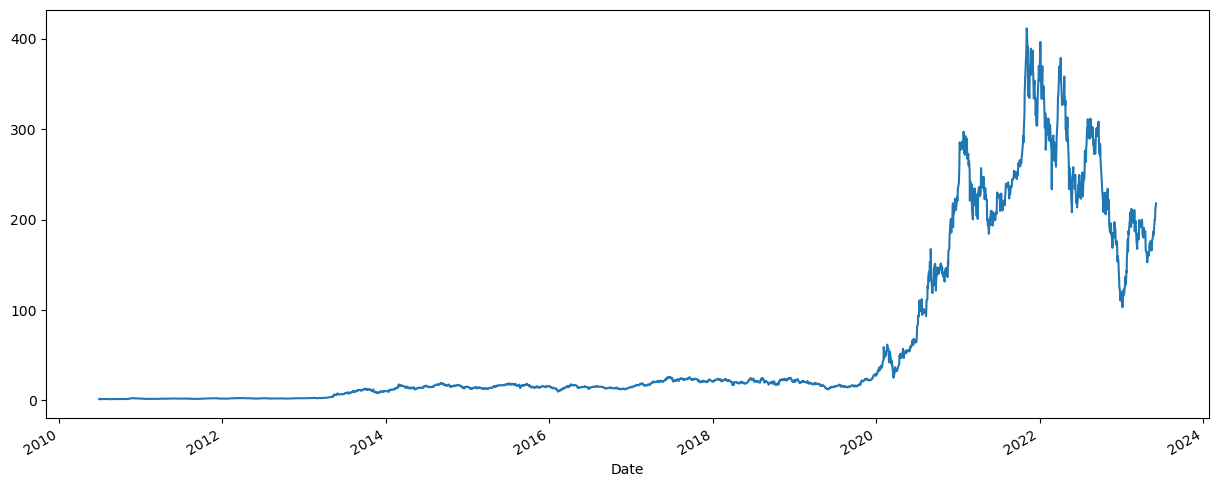

In [8]:
#simple moving average
df_tesla['Open'].plot(figsize=(15,6))

In [10]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

In [11]:
df_tesla['Open:10 days rolling'] 

Date
2010-06-29      1.266667
2010-06-30      1.493000
2010-07-01      1.550889
2010-07-02      1.546500
2010-07-06      1.503867
                 ...    
2023-05-30    180.583998
2023-05-31    183.996999
2023-06-01    187.414998
2023-06-02    191.007997
2023-06-05    195.070998
Name: Open:10 days rolling, Length: 3256, dtype: float64

<Axes: xlabel='Date'>

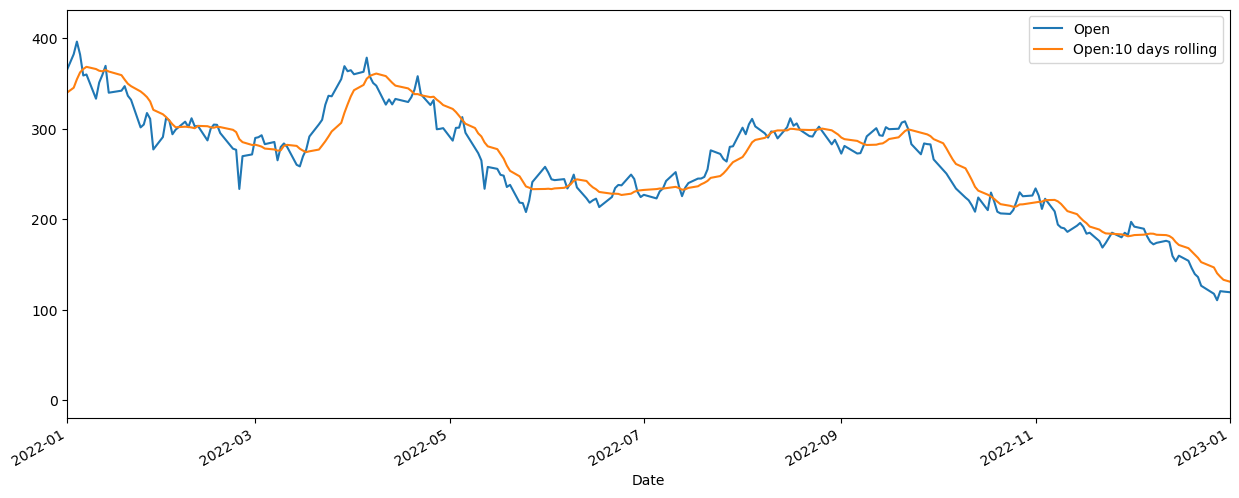

In [32]:
import numpy as np
df_tesla[['Open','Open:10 days rolling']].plot(xlim=[pd.to_datetime('2022-01-01'),pd.to_datetime('2023-01-01')],figsize=(15,6)) 

<Axes: xlabel='Date'>

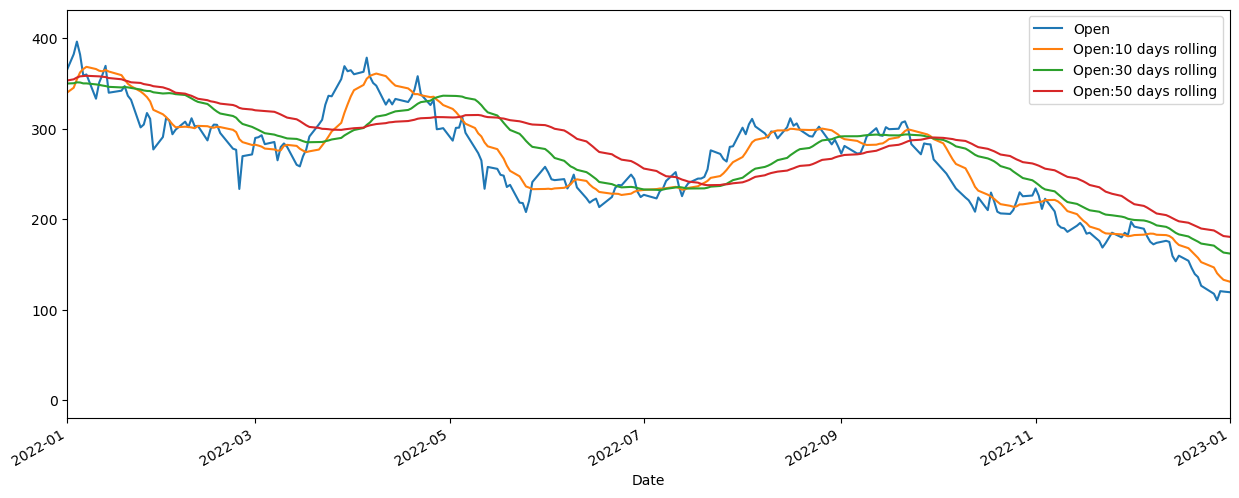

In [33]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=[pd.to_datetime('2022-01-01'),pd.to_datetime('2023-01-01')],figsize=(15,6)) 

<Axes: xlabel='Date'>

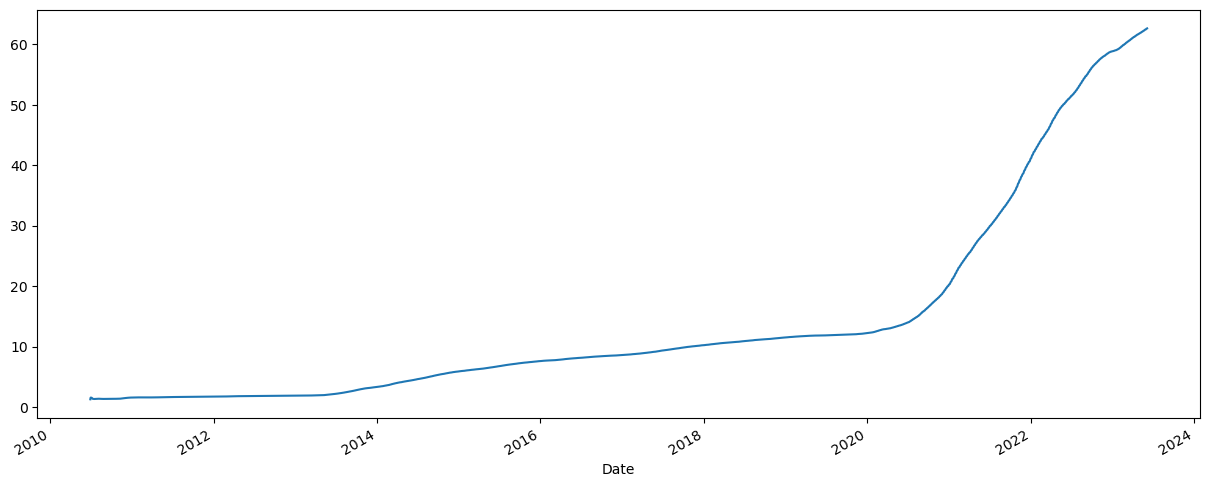

In [34]:
#Cumulative moving average

#use expanding function
df_tesla['Open'].expanding().mean().plot(figsize=(15,6))

In [36]:
#EMA
#smoothing factor - 0.1

df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()
df_tesla['EMA_0.1']

Date
2010-06-29      1.266667
2010-06-30      1.311934
2010-07-01      1.347407
2010-07-02      1.366000
2010-07-06      1.362733
                 ...    
2023-05-30    178.585761
2023-05-31    180.705184
2023-06-01    182.893666
2023-06-02    185.619298
2023-06-05    188.837369
Name: EMA_0.1, Length: 3256, dtype: float64

<Axes: xlabel='Date'>

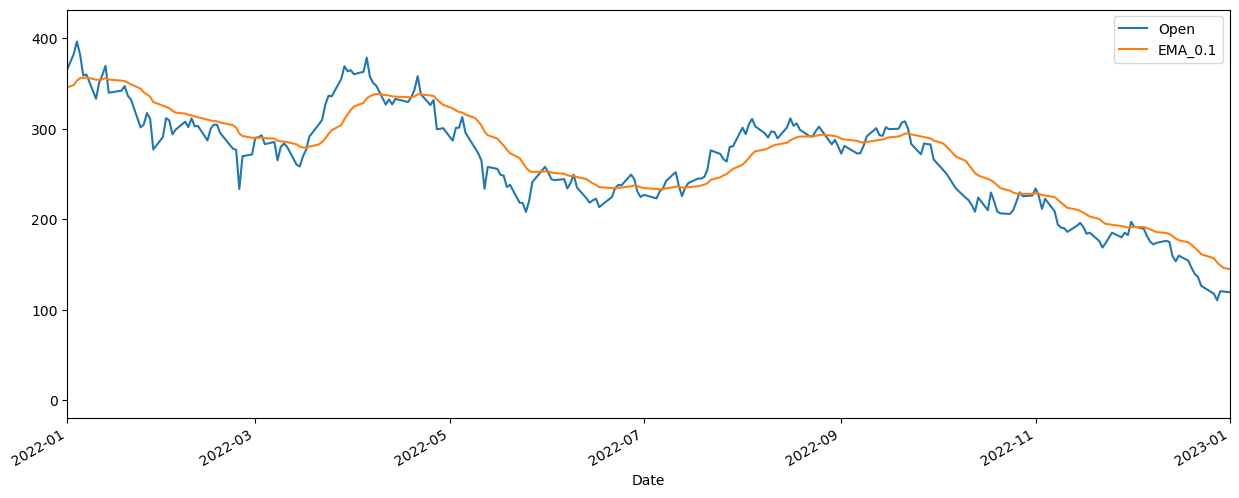

In [37]:
df_tesla[['Open','EMA_0.1']].plot(xlim=[pd.to_datetime('2022-01-01'),pd.to_datetime('2023-01-01')],figsize=(15,6)) 

<Axes: xlabel='Date'>

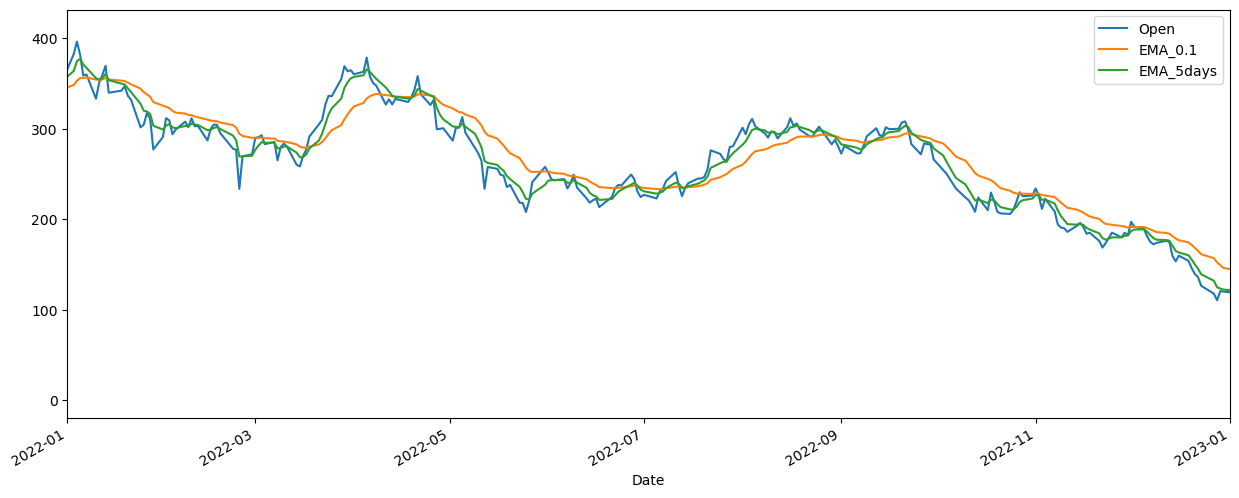

In [39]:
#EWMA - use span
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(xlim=[pd.to_datetime('2022-01-01'),pd.to_datetime('2023-01-01')],figsize=(15,6)) 